In [1]:
# Start by wrapping up last week's homework. 
# Look through some of the codingbat problems you struggled with

In [2]:
# some of these examples are loosely based on 
# https://medium.com/datadriveninvestor/machine-learning-preface-ba69bca4701d
# https://medium.com/datadriveninvestor/machine-learning-python-programming-introduction-for-business-people-10588e13ce9d
# You can reference them for more thorough analysis

In [3]:
# Let's start with a simple linear regression problem
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

x1 = np.random.rand(20)
x2 = np.random.rand(20)
y = x1/2 - x2 + np.random.rand(20) * .1

In [4]:
# What do you think the coefients of the linear regression solution to this problem are?
x = np.stack((x1, x2), 1)
RegressionModel = Ridge(1e-10).fit(x, y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)
coefs

array([ 0.51, -1.03])

In [5]:
# Talk about the above results. make sure you understand them.

In [6]:
# What a bout this scenario?
NUM_SAMPLES = 200

#Simulating data. x1 is random from 0 to 1
x1 = np.random.rand(NUM_SAMPLES)
#x2 is very correlated to x1, with small random fluctuations
x2 = x1 + np.random.rand(NUM_SAMPLES)/10

#x3-5 are random
x3 = np.random.rand(NUM_SAMPLES)
x4 = np.random.rand(NUM_SAMPLES)
x5 = np.random.rand(NUM_SAMPLES)

#y is generated by x1 - x2/2 + noise
y = x1 - x2/2 + np.random.rand(NUM_SAMPLES)/10

#Lets pack it all into a data frame. A data frame is similar to a SQL table, displayed below
df = pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3,'x4':x4,'x5':x5, 'y':y})

df.head()

,x1,x2,x3,x4,x5,y
0,0.273665,0.366497,0.100372,0.523403,0.622377,0.187915
1,0.912437,0.964898,0.154650,0.873316,0.923485,0.519015
2,0.460151,0.526112,0.419617,0.757241,0.497726,0.268902
3,0.340940,0.438013,0.648998,0.714708,0.791473,0.214051
4,0.020920,0.117272,0.628738,0.670038,0.824977,0.056756


In [7]:
# Looking at how y is calculated, do we think it will be positively or negatively correlated to x1 and x2?

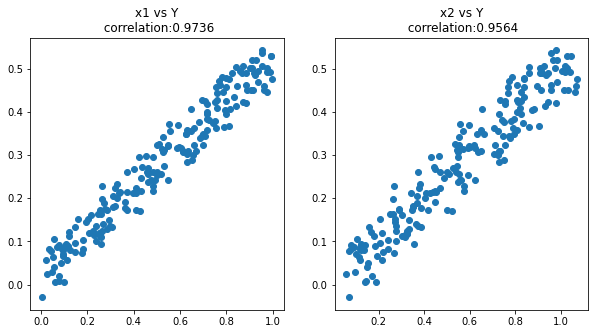

In [8]:
#Lets visualize the correlations between x1 vs Y and x2 vs Y
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).scatter(x1,y)
plt.title('x1 vs Y\n correlation:' + str(np.corrcoef(x1, y)[0,1].round(4)))
plt.subplot(1,2,2).scatter(x2,y)
plt.title('x2 vs Y\n correlation:' + str(np.corrcoef(x2, y)[0,1].round(4)))
plt.show()

In [9]:
# So do we think the regression coefficients will also both be positive?

In [10]:

X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
Y = df['y']

In [11]:
#Here we build a regression model using sklearn Ridge and fit it to our dataset
RegressionModel = Ridge(1e-3).fit(X,Y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)


In [12]:
print('Regression coefficients from Sklearn')
print(list(zip(['x1', 'x2', 'x3', 'x4', 'x5'], coefs)))

Regression coefficients from Sklearn
[('x1', 1.11), ('x2', -0.6), ('x3', 0.01), ('x4', 0.01), ('x5', 0.0)]


In [13]:
# Discuss why this worked whereas correlation was misleading.
# If we wanted the model to learn more precisely (x1: +1, x2: -.5), how could we change the dataset to help the model learn?

In [14]:
# Design your own custom problem set via random simulation
# Show that you can solve that problem set via ML and that the model
# can learn some of the ground truths of the simulation

In [15]:
n_data = 100
n_features = 30
x = np.random.rand(n_data, n_features)

feature_impacts = np.zeros(n_features)
feature_impacts[1] = 2
feature_impacts[5] = 5
feature_impacts[10] = -3
y = x.dot(feature_impacts)

In [16]:
# Check for the relationships we expect
# change to if 1 to see the relationships
if 0:
    for i in range(len(feature_impacts)):
        xi = x[:,i]
        print(i, np.corrcoef(xi, y)[0,1].round(1))

In [17]:
RegressionModel = Ridge().fit(x, y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)

In [18]:
coefs[[1, 5, 10]]

array([ 1.76,  4.29, -2.66])

In [19]:
# Show that if you reduced regularization, the model would learn the features more accurately

In [20]:
RegressionModel = Ridge(1e-10).fit(x, y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)

In [21]:
coefs[[1, 5, 10]]

array([ 2.,  5., -3.])

In [ ]:
# Potentially break here. The following section may be either in class, homework, or a following session.

In [22]:
# Images are complex objects with structure. Lets pretend we need to solve a problem with images.
# We want to design a pickle detector, where a pickle is defined as any cell that is close to black
# Above three cells which are <red, blue, green>. An image is either True or False based on if 
# they have a pickle or not.
# Design a dataset to solve this problem, then train a model (using either numpy or tensorflow)
# That solves it.
# Over the following few weeks we will get tools that let us model structured problems
# like these much more efficiently.

In [23]:
n_image = 100
width = 10
images = np.random.rand(n_image, width, width, 3) / 2 + .25
y = np.random.randint(2, size = n_image)

In [24]:
for i, yi in enumerate(y):
    if yi:
        loc_x = np.random.randint(width-1)
        loc_y = np.random.randint(1, width-1)
        images[i, loc_x, loc_y,:] = 0
        images[i, loc_x+1, loc_y-1,:] = [1, 0, 0]
        images[i, loc_x+1, loc_y,:] = [0, 1, 0]
        images[i, loc_x+1, loc_y+1,:] = [0, 0, 1]

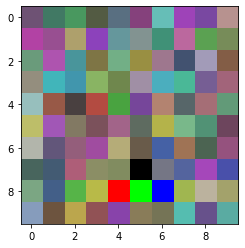

In [25]:
plt.imshow(images[y.argmax()])

In [26]:
# we have the dataset and it's visualized. now lets feed it into linear regression. 
# Let's just order all the values in this image in a line
images_line = images.reshape(images.shape[0], -1)

In [27]:
RegressionModel = Ridge().fit(images_line, y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)
coefs

array([ 0.  , -0.03,  0.  ,  0.06, -0.03,  0.01, -0.13,  0.  ,  0.02,
        0.14,  0.05, -0.02, -0.16, -0.  , -0.21, -0.03, -0.04, -0.13,
        0.02,  0.04, -0.17, -0.19,  0.02,  0.1 ,  0.01,  0.08,  0.07,
        0.02, -0.13, -0.02,  0.12, -0.05, -0.02, -0.1 ,  0.05,  0.08,
       -0.15, -0.02, -0.2 , -0.04,  0.08, -0.15, -0.12, -0.04,  0.05,
       -0.06,  0.04, -0.05, -0.21, -0.08,  0.18,  0.03, -0.16, -0.06,
       -0.12, -0.08, -0.08,  0.09, -0.01,  0.04, -0.03,  0.07, -0.  ,
       -0.13, -0.06, -0.06,  0.04,  0.01,  0.06, -0.17,  0.04, -0.2 ,
       -0.2 ,  0.09, -0.05,  0.05,  0.04, -0.  , -0.09, -0.07, -0.11,
       -0.06, -0.04, -0.14, -0.04, -0.03, -0.07,  0.12, -0.11,  0.02,
        0.05, -0.01,  0.04, -0.09,  0.23, -0.09, -0.02, -0.  ,  0.02,
       -0.16,  0.13, -0.19, -0.2 ,  0.03, -0.11, -0.02, -0.15, -0.05,
       -0.09, -0.03, -0.08, -0.12,  0.02,  0.08,  0.02, -0.13,  0.01,
       -0.09, -0.03,  0.06, -0.16,  0.15,  0.  , -0.09,  0.04,  0.04,
       -0.1 , -0.08,